# Topic: Heart disease Predictions

# 1. Background and Introduction

For my project, I will be working with the Cleveland database for heart disease. It was created by:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D..

I will be using machine learning techniques to predict heart disease in patients. In healthcare, there is so much data available that could be used to determine better prognosis, diagnosis, treatment, drug development, and overall healthcare for patients. I will be helping by learning how to extract knowledge for this dataset to move on to more in the hopes of understanding and helping to provide better healthcare. In my project, I will be focusing on the heart disease in patients. My result is an application.

I plan on using many machine learning techniques for my project, including gradient boosting, logistic regression, and naive bayes, which can be used to determine heart disease in patients. Gradient boosting is used to produce a prediction model in the form of typically a decision tree. The logistic regression will produce a model that displays the probability that a patient is readmitted to the hospital or not. Naive Bayes also predicts the probability that a patient is readmitted to the hospital or not based on various attributes. All three techniques are categorized into the supervised learning of machine learning. Therefore, they are ideal for my machine learning project.

I intend on understanding how different variables affect heart disease in patients. I will do an exploratory data analysis then feature modeling and model training. I plan on evaluating my machine learning algorithm by comparing the accuracy and ROC curves for each model. Accuracy will allow me to access the number of correct predictions as a percentage. It is the true positives and negatives divided by everything. The ROC curves will display the relationship between sensitivity and specificity. The ROC curve is the false positive rate, which is calculated by the false positives divided by the false positives plus true negatives.


# 2. Data and Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr

In [2]:
raw_data = pd.read_csv("heart.csv")

In [3]:
df = raw_data.copy()

In [4]:
df.shape

(303, 14)

# 2.a Data 

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 2.b Variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data Description

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

# 2.c Univariate analyses  

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
from scipy import stats
stats.mode(df['sex'])

ModeResult(mode=array([1]), count=array([207]))

# 2.d Exploratory Data Analysis

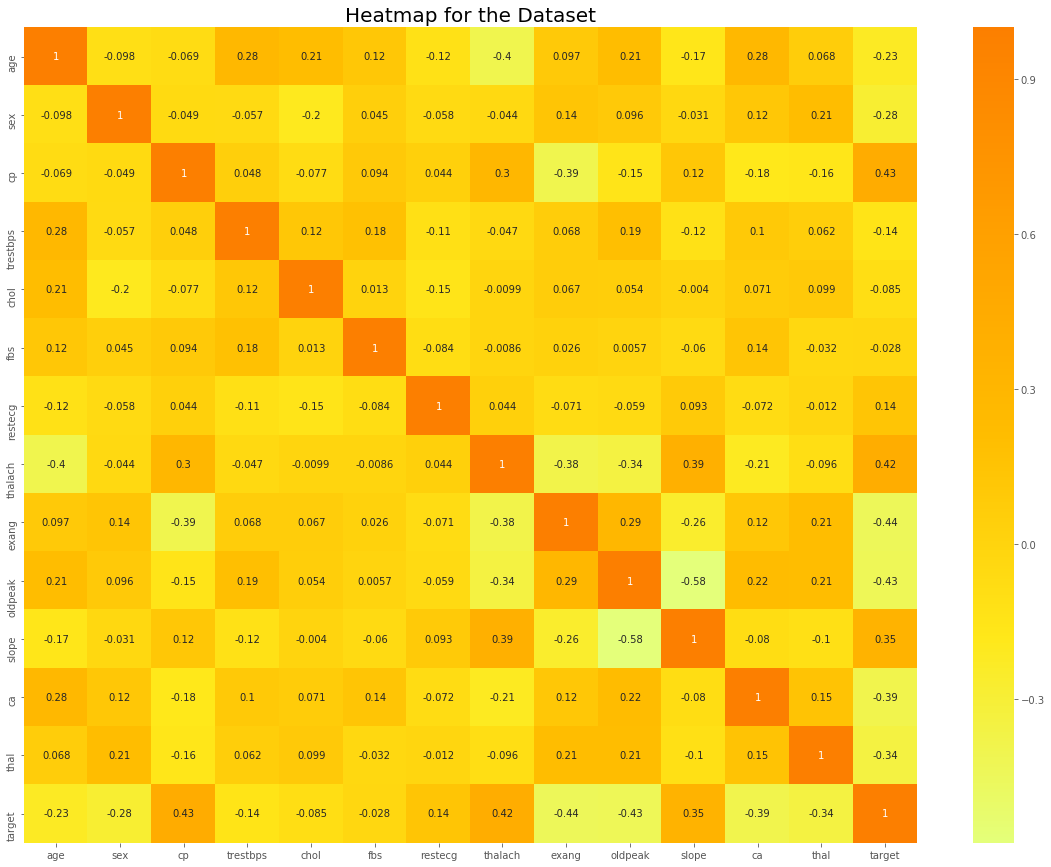

In [10]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [11]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=True)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

I explored all the variables that were moderately significantly correlated with target. 

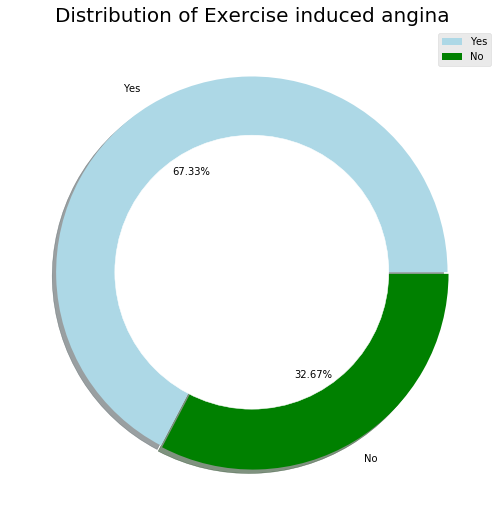

In [12]:
size = df['exang'].value_counts()
colors = ['lightblue', 'green']
labels = "Yes", "No"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Exercise induced angina', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

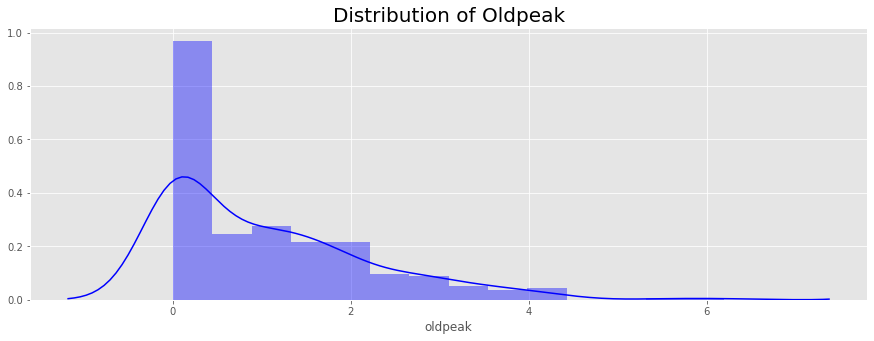

In [13]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['oldpeak'], color = 'blue')
plt.title('Distribution of Oldpeak', fontsize = 20)
plt.show()

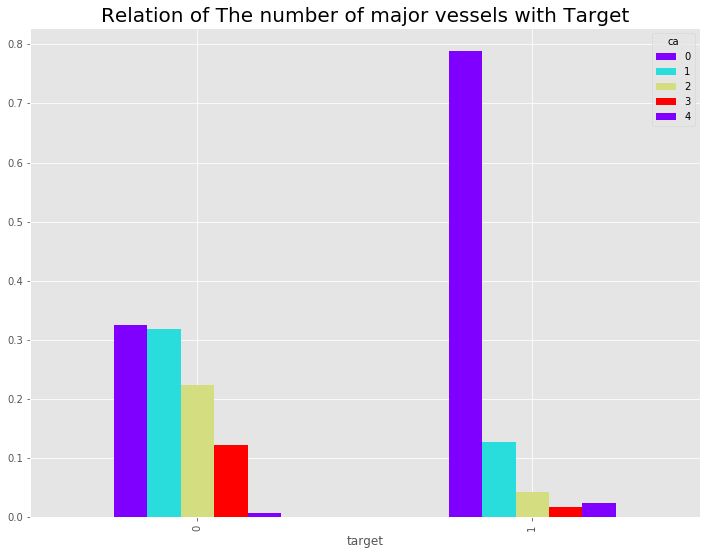

In [14]:
# ca: The number of major vessels (0-3)
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(df['target'], df['ca']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of The number of major vessels with Target', fontsize = 20, fontweight = 30)
plt.show()

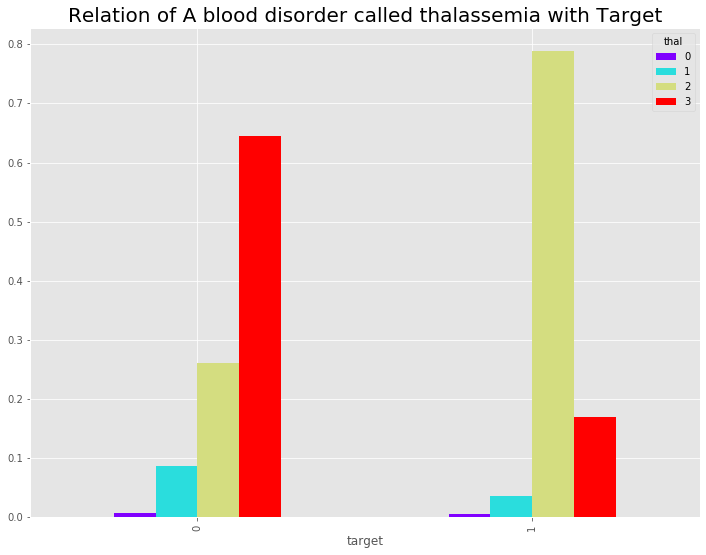

In [15]:
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(df['target'], df['thal']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of A blood disorder called thalassemia with Target', fontsize = 20, fontweight = 30)
plt.show()

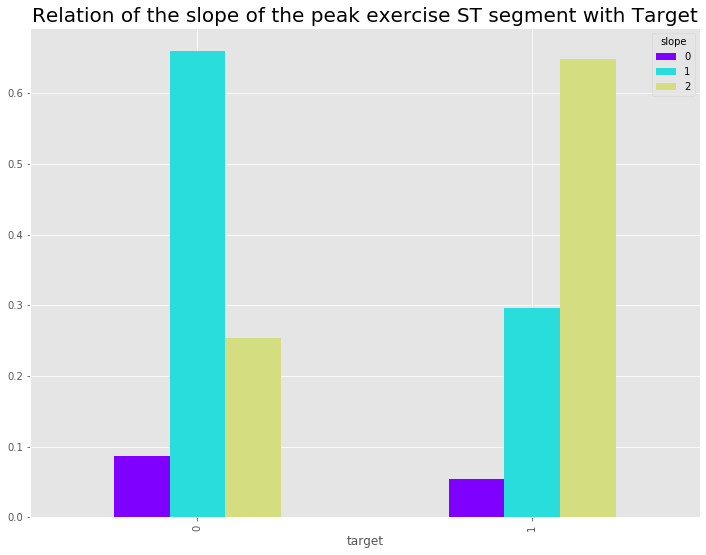

In [16]:
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(df['target'], df['slope']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of the slope of the peak exercise ST segment with Target', fontsize = 20, fontweight = 30)
plt.show()

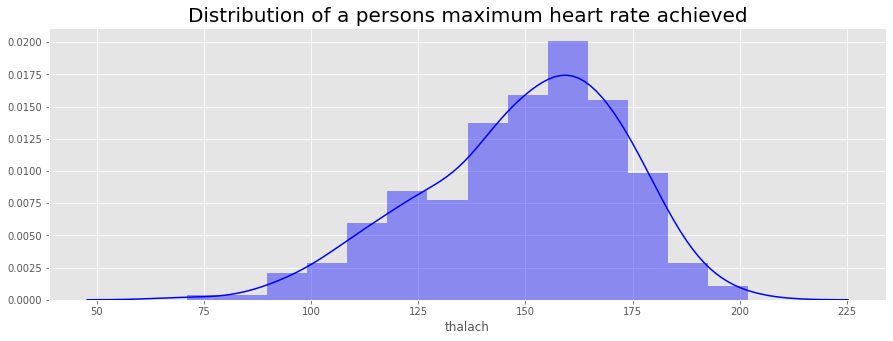

In [17]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['thalach'], color = 'blue')
plt.title('Distribution of a persons maximum heart rate achieved', fontsize = 20)
plt.show()

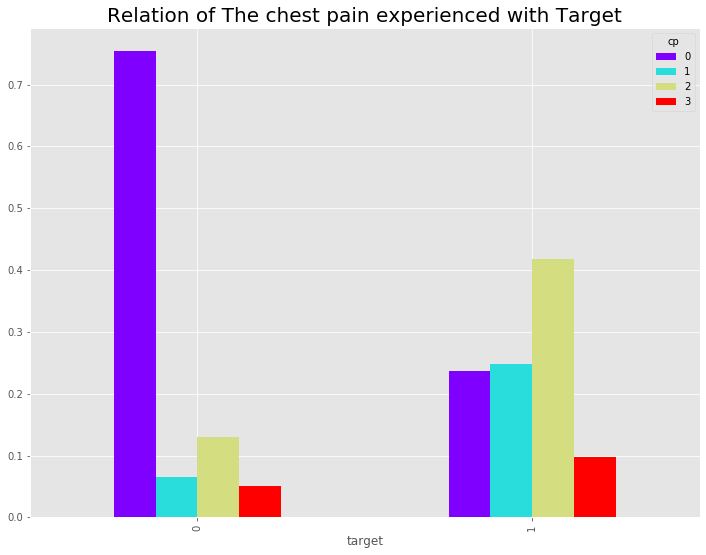

In [18]:
# cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(df['target'], df['cp']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of The chest pain experienced with Target', fontsize = 20, fontweight = 30)
plt.show()

# 3. Machine Learning Models

# 3.a Gradient boosting

In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [72]:
gradient = GradientBoostingClassifier()
gradient.fit(X, y);

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    

Learning rate:  0.05
Accuracy score (training): 0.877
Accuracy score (validation): 0.846
Learning rate:  0.075
Accuracy score (training): 0.887
Accuracy score (validation): 0.824
Learning rate:  0.1
Accuracy score (training): 0.887
Accuracy score (validation): 0.835
Learning rate:  0.25
Accuracy score (training): 0.892
Accuracy score (validation): 0.824
Learning rate:  0.5
Accuracy score (training): 0.920
Accuracy score (validation): 0.813
Learning rate:  0.75
Accuracy score (training): 0.958
Accuracy score (validation): 0.769
Learning rate:  1
Accuracy score (training): 0.939
Accuracy score (validation): 0.714


In [107]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=.05, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [81]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, predictions)))
print(test_set_rmse)

0.3922322702763681


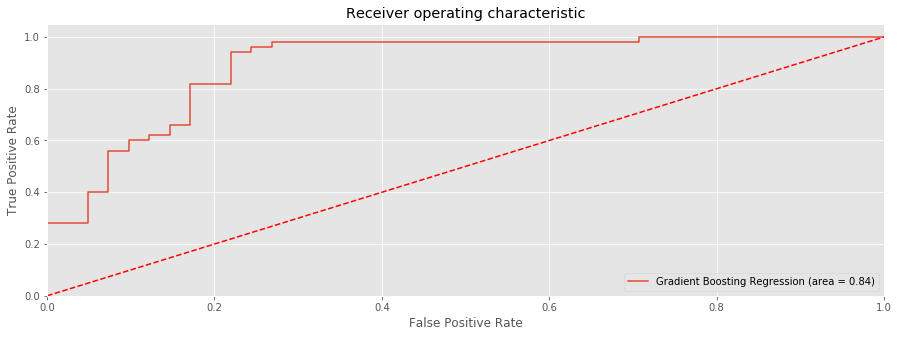

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_clf_roc_auc = roc_auc_score(y_test, gb_clf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_clf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Regression (area = %0.2f)' % gb_clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 3.b Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/violetkimble/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
# Make predictions using the testing set
y_pred_log = logreg.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [113]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred_log)))
print(test_set_rmse)

0.4322189107537832


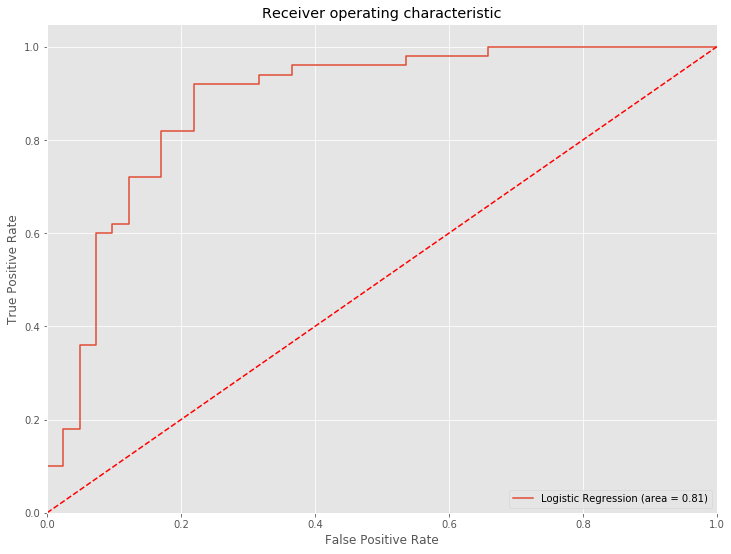

In [42]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 3.c Gaussian Naive Bayes

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [121]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
NB_predict = model.predict(X_test)

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, NB_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [126]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, NB_predict)))
print(test_set_rmse)

0.40599897147057507


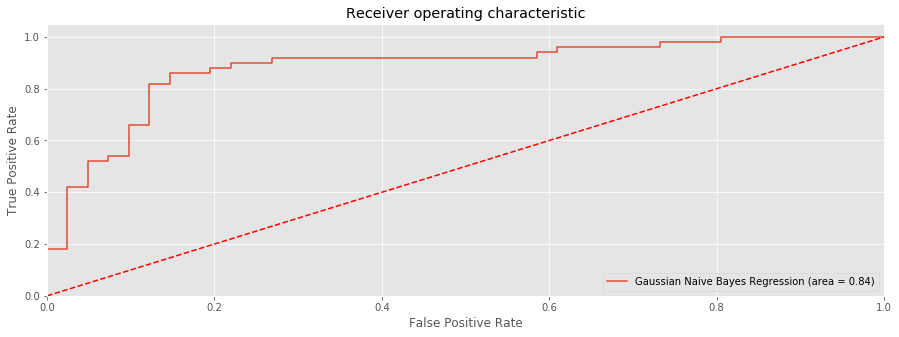

In [130]:
NB_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes Regression (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 4. Conclusion


Gradient boosting
* Accuracy: .85
* ROC curves area: .84
    
Logistic regression
* Accuracy: .81
* ROC curves area: .81
    
Naive bayes
* Accuracy: .84
* ROC curves area: .84

Overall, all three techniques are good for classifaction but Gradient boosting was the best machine learning techniques to predict heart disease in patients.